Instructions for updating:
Use `tf.global_variables_initializer` instead.
train_cost is: 0.0023564808
train_cost is: 0.002458809
train_cost is: 0.0026072243
train_cost is: 0.0026969328
train_cost is: 0.0027107166
train_cost is: 0.0026887944
train_cost is: 0.0026549143
train_cost is: 0.0026187634
train_cost is: 0.0025839875
train_cost is: 0.002551838
train_cost is: 0.0025226208
train_cost is: 0.0024962695
train_cost is: 0.0024725855
train_cost is: 0.002451332
train_cost is: 0.0024322746
train_cost is: 0.0024151963
train_cost is: 0.0023999016
train_cost is: 0.002386216
train_cost is: 0.0023739836
train_cost is: 0.002363065
train_cost is: 0.0023533334
train_cost is: 0.002344675
train_cost is: 0.0023369854
train_cost is: 0.0023301686
train_cost is: 0.002324137
train_cost is: 0.0023188088
train_cost is: 0.0023141108
train_cost is: 0.0023099736
train_cost is: 0.0023063356
train_cost is: 0.0023031407
train_cost is: 0.0023003381
train_cost is: 0.0022978813
train_cost is: 0.0022957297
train_cos

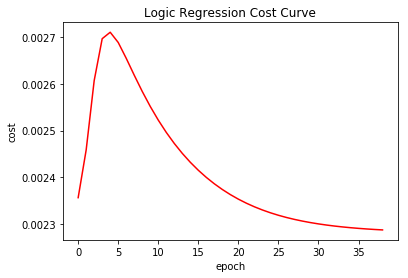

In [4]:
# -*- coding:utf-8 -*-
#功能： 使用tensorflow实现一个简单的逻辑回归
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
#创建占位符
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
 
#创建变量
#tf.random_normal([1])返回一个符合正太分布的随机数
w=tf.Variable(tf.random_normal([1],name='weight'))
b=tf.Variable(tf.random_normal([1],name='bias'))
 
y_predict=tf.sigmoid(tf.add(tf.multiply(X,w),b))
num_samples=400
cost=tf.reduce_sum(tf.pow(y_predict-Y,2.0))/num_samples
 
#学习率
lr=0.01
optimizer=tf.train.AdamOptimizer().minimize(cost)
 
#创建session 并初始化所有变量
num_epoch=500
cost_accum=[]
cost_prev=0
#np.linspace（）创建agiel等差数组，元素个素为num_samples
xs=np.linspace(-5,5,num_samples)
ys=np.sin(xs)+np.random.normal(0,0.01,num_samples)
 
with tf.Session() as sess:
  #初始化所有变量
  sess.run(tf.initialize_all_variables())
  #开始训练
  for epoch in range(num_epoch):
    for x,y in zip(xs,ys):
      sess.run(optimizer,feed_dict={X:x,Y:y})
    train_cost=sess.run(cost,feed_dict={X:x,Y:y})
    cost_accum.append(train_cost)
    print ("train_cost is:",str(train_cost))
 
    #当误差小于10-6时 终止训练
    if np.abs(cost_prev-train_cost)<1e-6:
      break
    #保存最终的误差
    cost_prev=train_cost
#画图 画出每一轮训练所有样本之后的误差
plt.plot(range(len(cost_accum)),cost_accum,'r')
plt.title('Logic Regression Cost Curve')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()